# Tictactrip - Crunching the data

##### Import Python Libraries

In [618]:
# math operations
import math
# numerical analysis
import numpy as np
# store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt
# advanced visualization package
import seaborn as sns
# interactive visualization package
import plotly.express as px
# color palette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801'

# locate the coordinates across the globe
from geopy.geocoders import Nominatim
# calculate distance between two points
from geopy import distance

##### Import Tictactrip Dataset

In [619]:
#Load Dataset: cities
cityDF = pd.read_csv("Fichier/cities.csv")
print("number of rows: ",cityDF.shape[0]) #number of rows
print("number of columns: ",cityDF.shape[1]) #number of columns
cityDF.head()

number of rows:  8040
number of columns:  6


id                     local_name unique_name   latitude  longitude  \
0   5159          Padua, Veneto, Italia       padua  45.406435  11.876761   
1     76    Barcelona, Cataluña, España   barcelona  41.385064   2.173404   
2     81    Basel, Basel-Stadt, Schweiz       basel  47.593437   7.619812   
3    259  Erlangen, Bayern, Deutschland    erlangen  49.589674  11.011961   
4  11979             Balș, Olt, România        balș  44.353354  24.095672   

   population  
0    209678.0  
1   1611822.0  
2         NaN  
3    105412.0  
4         NaN

In [620]:
#Load Dataset: stations
stationDF = pd.read_csv("Fichier/stations.csv")
print("number of rows: ",stationDF.shape[0]) #number of rows
print("number of columns: ",stationDF.shape[1]) #number of columns
stationDF.head()

number of rows:  11035
number of columns:  4


id                     unique_name   latitude  longitude
0   1      Aalen (Stuttgarter Straße)  48.835296  10.092956
1   2      Aéroport Bordeaux-Mérignac  44.830226  -0.700883
2   3                   Aéroport CDG   49.009900   2.559310
3   4  Aéroport de Berlin-Schönefeld   52.389446  13.520345
4   5             Aéroport de Dresden  51.123604  13.764737

In [621]:
#Load Dataset: providers
providerDF = pd.read_csv("Fichier/providers.csv")
print("number of rows: ",providerDF.shape[0]) #number of rows
print("number of columns: ",providerDF.shape[1]) #number of columns
providerDF.head()

number of rows:  227
number of columns:  10


id  company_id provider_id           name        fullname has_wifi  \
0   9           1         NaN         ouibus          Ouibus     True   
1  10           2         NaN        deinbus      Deinbus.de    False   
2  11           3         NaN        infobus         Infobus    False   
3  12           4         NaN  studentAgency  Student Agency    False   
4  13           5         NaN        flixbus         Flixbus     True   

  has_plug has_adjustable_seats has_bicycle transport_type  
0     True                 True       False            bus  
1    False                False       False            bus  
2    False                False       False            bus  
3    False                False       False            bus  
4    False                False       False            bus

In [622]:
#Load Dataset: tickets
ticketDF = pd.read_csv("Fichier/ticket_data.csv")
print("number of rows: ",ticketDF.shape[0]) #number of rows
print("number of columns: ",ticketDF.shape[1]) #number of columns
ticketDF.tail()

number of rows:  74168
number of columns:  12


id  company  o_station  d_station            departure_ts  \
74163  6869182       13      279.0    10729.0  2017-10-27 02:30:00+00   
74164  6869185        9      279.0      304.0  2017-10-27 07:00:00+00   
74165  6869187     8371    10642.0      304.0  2017-10-27 08:30:00+00   
74166  6869189       13      279.0      304.0  2017-10-27 13:25:00+00   
74167  6869191     8371    10642.0    10729.0  2017-10-27 14:45:00+00   

                   arrival_ts  price_in_cents                   search_ts  \
74163  2017-10-27 16:00:00+00            2590  2017-10-19 10:35:42.943+00   
74164  2017-10-27 13:30:00+00            2700  2017-10-19 10:35:42.943+00   
74165  2017-10-27 15:15:00+00            3000  2017-10-19 10:35:42.943+00   
74166  2017-10-27 21:10:00+00            2880  2017-10-19 10:35:42.943+00   
74167  2017-10-27 21:40:00+00            2000  2017-10-19 10:35:42.943+00   

      middle_stations other_companies  o_city  d_city  
74163       {408,408}          {8371}     628     562  
74164     {1105,1105}             {9}     628     562  
74165     {1105,1105}             {9}     628     562  
74166       {863,863}            {13}     628     562  
74167       {863,863}          {8371}     628     562

##### Inspecting the data

In [623]:
#Inspect Dataset: cities
cityDF.info()

#Observation: 
# - Presence of an "Id" column
# - Missing values in "Population" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [624]:
#Inspect Dataset: stations
stationDF.info()

#Observation: 
# - Presence of an "Id" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [625]:
#Inspect Dataset: providers
providerDF.info()

#Observation: 
# - Presence of an "Id" column
# - Presence of a "Provider_id" column (same information as "Id")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [626]:
#Inspect Dataset: tickets
ticketDF.info()

#Observation: 
# - Presence of an "Id" column
# - Data type of column "O_station" is not int
# - Data type of column "D_station" is not int
# - Data type of column "Departure_ts" is not DateTime
# - Data type of column "Arrival_ts" is not DateTime
# - Data type of column "Search_ts" is not DateTime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


##### Preprocessing the data

1/ Preprocessing of City Dataset

In [627]:
#Preprocessing: Change in indexation
if cityDF["id"].nunique() == cityDF.shape[0]: #Check the uniqueness of ids
    cityDF.set_index("id",inplace=True)
    print("New indexing successfully completed")
else:
    print("Verification of ids required")

New indexing successfully completed


In [628]:
#Preprocessing: Create a new column
cityDF['place'] = list(zip(cityDF.latitude, cityDF.longitude))
#Objective: Get the coordinates of the city

In [629]:
#Inspect Data: Missing Values
cityDF.isna().sum()/cityDF.shape[0]*100 

#Observation:
# - 95% of missing data in the population column

local_name      0.000000
unique_name     0.012438
latitude        0.000000
longitude       0.000000
population     95.410448
place           0.000000
dtype: float64

In [630]:
#Visualise Data:
cityDF.head()

local_name unique_name   latitude  longitude  \
id                                                                       
5159           Padua, Veneto, Italia       padua  45.406435  11.876761   
76       Barcelona, Cataluña, España   barcelona  41.385064   2.173404   
81       Basel, Basel-Stadt, Schweiz       basel  47.593437   7.619812   
259    Erlangen, Bayern, Deutschland    erlangen  49.589674  11.011961   
11979             Balș, Olt, România        balș  44.353354  24.095672   

       population                             place  
id                                                   
5159     209678.0          (45.4064349, 11.8767611)  
76      1611822.0           (41.3850639, 2.1734035)  
81            NaN           (47.5934368, 7.6198121)  
259      105412.0  (49.5896744, 11.011961099999999)  
11979         NaN          (44.3533537, 24.0956725)

2/ Preprocessing of Station Dataset

In [631]:
#Preprocessing: Change in indexation
if stationDF["id"].nunique() == stationDF.shape[0]: #Check the uniqueness of ids
    stationDF.set_index("id",inplace=True)
    print("New indexing successfully completed")
else:
    print("Verification of ids required")

New indexing successfully completed


In [632]:
#Preprocessing: Create a new column
stationDF['place'] = list(zip(stationDF.latitude, stationDF.longitude))
#Objective: Get the coordinates of the station

In [633]:
#Visualise Data:
stationDF.head()

unique_name   latitude  longitude  \
id                                                         
1       Aalen (Stuttgarter Straße)  48.835296  10.092956   
2       Aéroport Bordeaux-Mérignac  44.830226  -0.700883   
3                    Aéroport CDG   49.009900   2.559310   
4   Aéroport de Berlin-Schönefeld   52.389446  13.520345   
5              Aéroport de Dresden  51.123604  13.764737   

                                   place  
id                                        
1                 (48.835296, 10.092956)  
2                 (44.830226, -0.700883)  
3                     (49.0099, 2.55931)  
4                 (52.389446, 13.520345)  
5   (51.1236038208008, 13.7647371292114)

3/ Preprocessing of Provider Dataset

In [634]:
#Preprocessing: Cleaning
providerDF.drop("provider_id",axis=1, inplace=True)

In [635]:
#Preprocessing: Change in indexation
if providerDF["id"].nunique() == providerDF.shape[0]: #Check the uniqueness of ids
    providerDF.set_index("id",inplace=True)
    print("New indexing successfully completed")
else:
    print("Verification of ids required")

New indexing successfully completed


In [636]:
#Inspect Data: Missing Values
providerDF.isna().sum()/providerDF.shape[0]*100

#Observation:
# - Almost all data is present in the dataset

company_id              0.000000
name                    0.000000
fullname                0.000000
has_wifi                1.321586
has_plug                1.321586
has_adjustable_seats    1.321586
has_bicycle             1.321586
transport_type          0.000000
dtype: float64

In [637]:
#Visualise Data:
providerDF.head()

company_id           name        fullname has_wifi has_plug  \
id                                                                
9            1         ouibus          Ouibus     True     True   
10           2        deinbus      Deinbus.de    False    False   
11           3        infobus         Infobus    False    False   
12           4  studentAgency  Student Agency    False    False   
13           5        flixbus         Flixbus     True    False   

   has_adjustable_seats has_bicycle transport_type  
id                                                  
9                  True       False            bus  
10                False       False            bus  
11                False       False            bus  
12                False       False            bus  
13                False       False            bus

4/ Preprocessing of Ticket Dataset

In [638]:
#Preprocessing: Change in indexation
if ticketDF["id"].nunique() == ticketDF.shape[0]: #Check the uniqueness of ids
    ticketDF.set_index("id",inplace=True)
    print("New indexing successfully completed")
else:
    print("Verification of ids required")

New indexing successfully completed


In [639]:
#Preprocessing: Modify data type
station_column = ["o_station","d_station"]
ticketDF[station_column] = ticketDF[station_column].fillna(0) #Fill missing values with 0's
ticketDF[station_column] = ticketDF[station_column].astype(int) #Convert data type into integer

In [640]:
#Preprocessing: Modify data type
time_column = ["departure_ts","arrival_ts","search_ts"]
ticketDF[time_column] = ticketDF[time_column].apply(pd.to_datetime) #Convert data type into DateTime

In [641]:
#Inspect Data: Data types
ticketDF.dtypes

company                          int64
o_station                        int32
d_station                        int32
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts          datetime64[ns, UTC]
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
dtype: object

In [642]:
#Preprocessing: Create a new column
ticketDF["time_before_departure"] = (ticketDF["departure_ts"] - ticketDF["search_ts"]).dt.days
#Objective: Get the number of days between the customer's ticket search and the actual departure

In [643]:
#Preprocessing: Create a new column
ticketDF["travel_time"] = ticketDF["arrival_ts"] - ticketDF["departure_ts"]
#Objective: Get the duration of the trip (Exact Duration)

In [644]:
#Preprocessing: Create a new column
ticketDF["travel_time_in_hour"] = (ticketDF["travel_time"].dt.days*24) + (ticketDF["travel_time"].dt.components['hours'])
#Objective: Get the duration of the trip (Duration in Hours)

In [645]:
#Visualise Data:
ticketDF.head()

company  o_station  d_station              departure_ts  \
id                                                                 
6795025     8385          0          0 2017-10-13 14:00:00+00:00   
6795026        9         63       1044 2017-10-13 13:05:00+00:00   
6795027     8377       5905       6495 2017-10-13 13:27:00+00:00   
6795028     8377       5905       6495 2017-10-13 13:27:00+00:00   
6795029     8381       5905       6495 2017-10-13 21:46:00+00:00   

                       arrival_ts  price_in_cents  \
id                                                  
6795025 2017-10-13 20:10:00+00:00            4550   
6795026 2017-10-14 06:55:00+00:00            1450   
6795027 2017-10-14 21:24:00+00:00            7400   
6795028 2017-10-14 11:02:00+00:00           13500   
6795029 2017-10-14 19:32:00+00:00            7710   

                               search_ts      middle_stations other_companies  \
id                                                                              
6795025 2017-10-01 00:13:31.327000+00:00                  NaN             NaN   
6795026 2017-10-01 00:13:35.773000+00:00            {149,418}            {13}   
6795027 2017-10-01 00:13:40.212000+00:00  {798,798,6794,6246}     {8377,8376}   
6795028 2017-10-01 00:13:40.213000+00:00  {798,798,6794,6246}     {8377,8376}   
6795029 2017-10-01 00:13:40.213000+00:00          {5983,5983}          {8380}   

         o_city  d_city  time_before_departure     travel_time  \
id                                                               
6795025     611     542                     12 0 days 06:10:00   
6795026     611     542                     12 0 days 17:50:00   
6795027     611     542                     12 1 days 07:57:00   
6795028     611     542                     12 0 days 21:35:00   
6795029     611     542                     12 0 days 21:46:00   

         travel_time_in_hour  
id                            
6795025                    6  
6795026                   17  
6795027                   31  
6795028                   21  
6795029                   21

##### Extract the information

### 1/ Temporal Analysis

Step 1: Analyse the distribution of travel times

In [646]:
#Temporal Analysis: Travel Times
ticketDF["travel_time"].describe()

#Observation:
# - Average travel time: 7h
# - Min travel time: 20min
# - Max travel time: 21days
# - 75% of travel times take less than 8h

count                     74168
mean     0 days 07:04:37.247600
std      0 days 09:54:58.881351
min             0 days 00:20:00
25%             0 days 03:00:00
50%             0 days 04:50:00
75%             0 days 08:00:00
max            20 days 12:51:00
Name: travel_time, dtype: object

In [648]:
#Graphic Representation: Travel Times
ticketDayTrip = ticketDF[ticketDF["travel_time_in_hour"]<=24] #Avoid extreme values for more precision
print("Number of tickets (<24h):", ticketDayTrip.shape[0], "tickets")
print("Database data percentage: ", round(ticketDayTrip.shape[0]/ticketDF.shape[0]*100,2),"%") 

#Distribution Plot of Travel Times:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("white")
sns.set_context("paper")
sns.set_palette('GnBu')
ax = sns.distplot(ticketDayTrip["travel_time_in_hour"],
                  kde=True, kde_kws=dict(linewidth=3),
                  bins=20,
                  color="#28B463",
                  ax=ax)

#Observation:
# - Most travel last between 2h and 8h
# - As seen before, 75% of travel times take less than 8h

Number of tickets (<24h): 71794 tickets
Database data percentage:  96.8 %


Step 2: Analyse the distribution of the number of days between the customer's ticket search and the actual departure

In [649]:
#Temporal Analysis: Time Before Departure
ticketDF["time_before_departure"].describe()

#Observation:
# - Average time: 7days
# - Min time: Negative value 
# - Max time: 176days
# - Tickets are searched 8 days before the departure in 75% of cases

#Problem: Presence of negative value indicating tickets are searched after departure

count    74168.000000
mean         6.722036
std         10.582113
min        -24.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        176.000000
Name: time_before_departure, dtype: float64

### 2/ Price Analysis

Step 1: Analyse the distribution of ticket prices

In [650]:
#Price Analysis: Ticket Prices
ticketDF["price_in_cents"].describe()

#Observation:
# - Average cost: 43.83€
# - Min cost: 3€
# - Max cost: 385.50€
# - Ticket cost generally less than 50€ in 75% of cases

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

In [651]:
#Graphic Representation: Ticket Prices

#Distribution Plot of Ticket Prices:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("white")
sns.set_context("paper")
sns.set_palette('GnBu')
ax = sns.distplot(ticketDayTrip["price_in_cents"], 
                  kde=True, 
                  kde_kws=dict(linewidth=3), 
                  bins=50, 
                  color="#39B6C1",
                  ax=ax)

#Observation:
# - Most tickets cost under 100€
# - As seen before, 75% of tickets cost less than 50€

Step 2: Test the relationship between ticket prices and travel times

Objective: Try to understand if longer travel times are more expensive than short travel.

Number of tickets (Short Trip): 37737
Number of tickets (Long Trip): 36431


Text(0.5, 0, 'Price (in cents)')

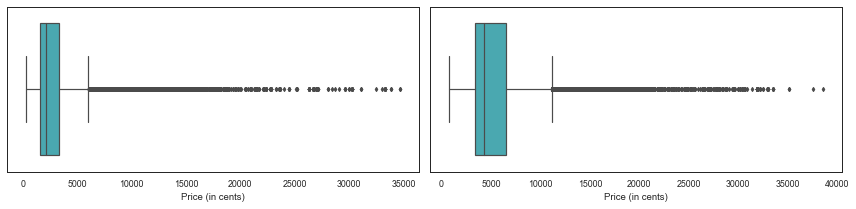

In [652]:
#Graphic Representation: Ticket Prices & Travel Times
ticketShortTrip = ticketDF[ticketDF["travel_time_in_hour"]<=4] #The median value is 4h
print("Number of tickets (Short Trip):", ticketShortTrip.shape[0]) #Almost same amount of data (avoid biasing the results)
ticketLongTrip = ticketDF[ticketDF["travel_time_in_hour"]>4] #The median value is 4h
print("Number of tickets (Long Trip):", ticketLongTrip.shape[0]) #Almost same amount of data (avoid biasing the results)

#Boxplot of Ticket Prices in two cases:
fig, ax = plt.subplots(1,2,tight_layout=True, figsize=(12,3))
sns.set_style("white")
sns.set_context("paper")
sns.set_palette('GnBu')
ax[0]= sns.boxplot(data=ticketShortTrip, x="price_in_cents", fliersize=3, color="#39B6C1", ax=ax[0]) #Case 1: Short trip
ax[0].set_xlabel("Price (in cents)")
ax[1]= sns.boxplot(data=ticketLongTrip, x="price_in_cents", fliersize=3, color="#39B6C1", ax=ax[1]) #Case 2: Long trip
ax[1].set_xlabel("Price (in cents)")

#Observation:
# Longer trips seem to be more expensive than short trip on average. 
# Nevertheless, we find an almost similar distribution in both cases. 
# Representing the data through scatterplot will allow a better perception of the distribution

Number of tickets (Short Trip): 37737
Number of tickets (Long Trip): 36431


Text(0, 0.5, 'Ticket Prices')

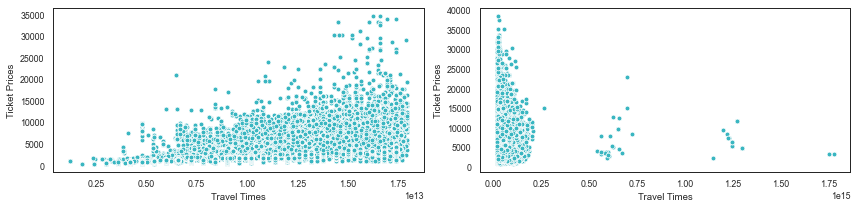

In [653]:
#Graphic Representation: Ticket Prices & Travel Times
ticketShortTrip = ticketDF[ticketDF["travel_time_in_hour"]<=4]
print("Number of tickets (Short Trip):", ticketShortTrip.shape[0])
ticketLongTrip = ticketDF[ticketDF["travel_time_in_hour"]>4]
print("Number of tickets (Long Trip):", ticketLongTrip.shape[0])

#Scatterplot of Ticket Prices in two cases:
fig, ax = plt.subplots(1,2,tight_layout=True, figsize=(12,3))
sns.set_style("white")
sns.set_context("paper")
sns.set_palette('Blues')
ax[0] = sns.scatterplot(data=ticketShortTrip, x="travel_time", y="price_in_cents", color="#39B6C1", ax=ax[0]) #Case 1:
ax[0].set_xlabel("Travel Times")
ax[0].set_ylabel("Ticket Prices")
ax[1] = sns.scatterplot(data=ticketLongTrip, x="travel_time", y="price_in_cents", color="#39B6C1", ax=ax[1]) #Case 2:
ax[1].set_xlabel("Travel Times")
ax[1].set_ylabel("Ticket Prices")

#Observation:
# The price of tickets reach significant amounts as the travel time is important for short trip. 
# Nevertheless, reduced price tickets are always present regardless of the number of hours of travel.
# However, there is a general drop in ticket prices for long journeys.

Step 3: Test the relationship between ticket prices & travel times & advance ticket purchase

Objective: Try to understand if tickets are cheaper when bought in advance.

In [654]:
#Graphic Representation: Ticket Prices & Travel Times & Advance Ticket Purchase

#Avoid extreme values for more precision and avoid non-logical values (ticket searched after departure)
ticketNormalTrip = ticketDF[(ticketDF["travel_time_in_hour"]<=24) & (ticketDF["time_before_departure"]>0)]
print("Number of tickets purchased in advance (<24h):", ticketNormalTrip.shape[0], "tickets")
print("Database data percentage: ", round(ticketNormalTrip.shape[0]/ticketDF.shape[0]*100,2),"%") 

#Scatterplot of Ticket Prices:
fig, ax = plt.subplots(figsize=(12,4))
sns.set_style("dark")
sns.set_context("paper")
sns.set_palette('GnBu')
ax.set_facecolor('#D4E6F1')
ax = sns.scatterplot(data=ticketNormalTrip, 
                     x="travel_time", y="price_in_cents", 
                     hue="time_before_departure", 
                     size="time_before_departure", sizes=(10, 100), 
                     palette="Blues",
                     ax=ax)
ax.set_xlabel("Travel Times")
ax.set_ylabel("Ticket Prices")

#Observation:
# The distribution of points corresponds to the previous observation.
# However, tickets purchased in advance correspond essentially to long travel tickets
# Tickets bought in advance also seem to be the cheapest.

Number of tickets purchased in advance (<24h): 62392 tickets
Database data percentage:  84.12 %


Text(0, 0.5, 'Ticket Prices')

Step 4: Test the relationship between ticket prices & advance ticket purchase

Objective: Try to understand if tickets bought in advance are cheaper.

Number of tickets purchased in advance (<24h): 62392 tickets
Database data percentage:  84.12 %


Text(0, 0.5, 'Ticket Prices')

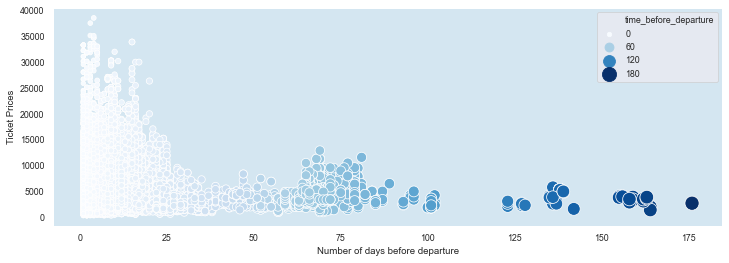

In [655]:
#Graphic Representation: Ticket Prices & Travel Times & Advance Ticket Purchase

#Avoid extreme values for more precision and avoid non-logical values (ticket searched after departure)
ticketNormalTrip = ticketDF[(ticketDF["travel_time_in_hour"]<=24) & (ticketDF["time_before_departure"]>0)]
print("Number of tickets purchased in advance (<24h):", ticketNormalTrip.shape[0], "tickets")
print("Database data percentage: ", round(ticketNormalTrip.shape[0]/ticketDF.shape[0]*100,2),"%") 

#Scatterplot of Ticket Prices:
fig, ax = plt.subplots(figsize=(12,4))
sns.set_style("dark")
sns.set_context("paper")
sns.set_palette('GnBu')
ax.set_facecolor('#D4E6F1')
ax = sns.scatterplot(data=ticketNormalTrip, 
                     x="time_before_departure", 
                     y="price_in_cents", 
                     hue="time_before_departure", 
                     size="time_before_departure", sizes=(20, 200), 
                     palette="Blues",
                     ax=ax)
ax.set_xlabel("Number of days before departure")
ax.set_ylabel("Ticket Prices")

#Observation:
# As seen before, tickets bought in advance are cheaper.
# A ticket purchased approximately 1 month in advance will generally have better prices

### 3/ Transport Analysis

Step 1: Perform the join between ticket database and provider database

In [656]:
#Copy Dataset: tickets
ticketDF_bis = ticketDF.copy(deep=True)

In [657]:
#Preprocessing: Change in indexation
ticketDF_bis.set_index("company",inplace=True)

In [658]:
#Concatenate: Ticket Dataframe & Provider Dataframe
ticketProviderDF = pd.concat([ticketDF_bis, providerDF], axis=1, join="inner")
print("number of rows: ",ticketProviderDF.shape[0]) #number of rows
print("number of columns: ",ticketProviderDF.shape[1]) #number of columns
ticketProviderDF.head()

number of rows:  74168
number of columns:  21


o_station  d_station              departure_ts  \
8385          0          0 2017-10-13 14:00:00+00:00   
9            63       1044 2017-10-13 13:05:00+00:00   
8377       5905       6495 2017-10-13 13:27:00+00:00   
8377       5905       6495 2017-10-13 13:27:00+00:00   
8381       5905       6495 2017-10-13 21:46:00+00:00   

                    arrival_ts  price_in_cents  \
8385 2017-10-13 20:10:00+00:00            4550   
9    2017-10-14 06:55:00+00:00            1450   
8377 2017-10-14 21:24:00+00:00            7400   
8377 2017-10-14 11:02:00+00:00           13500   
8381 2017-10-14 19:32:00+00:00            7710   

                            search_ts      middle_stations other_companies  \
8385 2017-10-01 00:13:31.327000+00:00                  NaN             NaN   
9    2017-10-01 00:13:35.773000+00:00            {149,418}            {13}   
8377 2017-10-01 00:13:40.212000+00:00  {798,798,6794,6246}     {8377,8376}   
8377 2017-10-01 00:13:40.213000+00:00  {798,798,6794,6246}     {8377,8376}   
8381 2017-10-01 00:13:40.213000+00:00          {5983,5983}          {8380}   

      o_city  d_city  ...     travel_time travel_time_in_hour  company_id  \
8385     611     542  ... 0 days 06:10:00                   6          11   
9        611     542  ... 0 days 17:50:00                  17           1   
8377     611     542  ... 1 days 07:57:00                  31          10   
8377     611     542  ... 0 days 21:35:00                  21          10   
8381     611     542  ... 0 days 21:46:00                  21          10   

                 name            fullname has_wifi has_plug  \
8385              bbc           Blablacar    False    False   
9              ouibus              Ouibus     True     True   
8377  corailintercite          Intercités    False    False   
8377  corailintercite          Intercités    False    False   
8381      coraillunea  Intercités de Nuit    False    False   

     has_adjustable_seats has_bicycle transport_type  
8385                False       False     carpooling  
9                    True       False            bus  
8377                 True       False          train  
8377                 True       False          train  
8381                 True       False          train  

[5 rows x 21 columns]

Step 2: Analyse the distribution of the different types of transport

In [659]:
#Transport Analysis: Transport Types

#Get the information about the types of transport
df = ticketProviderDF.loc[:,["transport_type"]]

#Calculate the distribution of tickets according to the type of transport
df['count'] = 1
df = df.groupby("transport_type")["count"].sum().to_frame().reset_index()

#Calculate the distribution of tickets according to the type of transport (%)
df['percentage'] = df["count"]/df["count"].sum()*100
df.head()

transport_type  count  percentage
0            bus  13798   18.603710
1     carpooling  41441   55.874501
2          train  18929   25.521788

In [662]:
#Graphic Representation: Transport Types

#Interactive Barplot of Transport Types:
fig = px.bar(df, x="transport_type", y="count",
             color="transport_type",
             title="Transport Type",
             width=800, height=400)
fig.show()

#Observation:
# - 13 798 tickets bought for bus services
# - 41 441 tickets bought for carpooling services
# - 18 929 tickets bought for train services

In [663]:
#Graphic Representation: Transport Types

#Interactive Treemap of Transport Types:
fig = px.treemap(df, 
                 path=["transport_type"], 
                 values="percentage", 
                 color_discrete_sequence=[act, rec, dth], 
                 height=225)
fig.show()

#Observation:
# - carpooling services: 55.9% of all tickets
# - train services: 25.5% of all tickets
# - bus services: 18.6% of all tickets

Step 3: Test the relationship between ticket prices & travel times & transport types

Objective: Try to understand if the types of transport impact the price of the ticket

In [664]:
#Graphic Representation: Ticket Prices & Travel Times & Transport Types

#Interactive Scatterplot of Ticket Prices:
df = ticketProviderDF.loc[ticketProviderDF["travel_time_in_hour"]<24]
px.scatter(df, x="travel_time_in_hour", y="price_in_cents",
           log_x=False, log_y=True,
           color="transport_type",
           facet_col_wrap=3, facet_col="transport_type",
           height=300, width=0)

#Observation:
# Tickets for carpooling services are mostly cheaper for short distances.
# Nevertheless, prices for carpooling services increase according to the travel time.
# On the contrary, the price of tickets for bus and train services are more homogeneous.
# However, the price of train tickets reaches higher prices than the bus tickets.

Step 4: Test the relationship between the functionality offered by the service and the type of transport

Objective: Try to understand if a service with more functionality is more expensive

In [669]:
#Transport Analysis: Transport Types & Functionalities

#Get all information from the previous concatenation (Ticket Dataframe & Provider Dataframe)
df = ticketProviderDF.loc[:,ticketProviderDF.columns]

#Pivot table with all information about the distribution of functionalities offered by each type of transport
df = df.pivot_table(index="transport_type",
                    values=["has_wifi","has_plug","has_adjustable_seats","has_bicycle"],
                    aggfunc="sum")

#Convert pivot table to dataframe
df = df.reset_index()
df.head()

transport_type  has_adjustable_seats  has_bicycle  has_plug  has_wifi
0            bus                  6062            0      5167     12600
1     carpooling                     0            0         0         0
2          train                 18133          796       796       796

In [668]:
#Graphic Representation: Transport Types & Functionalities

#Barplot of transport types that offer wifi option:
fig, ax = plt.subplots(1,4,tight_layout=True, figsize=(20,4))
ax[0]=df.plot.bar(x="transport_type", y="has_wifi",color="#28B463", alpha=0.5, ax=ax[0])
ax[0].set_xlabel("Transport Type")
ax[0].set_ylabel("Wifi")
ax[0].set_facecolor('white')

#Barplot of transport types that offer plug option:
ax[1]=df.plot.bar(x="transport_type", y="has_plug",color="#28B463", alpha=0.5, ax=ax[1])
ax[1].set_xlabel("Transport Type")
ax[1].set_ylabel("Plug")
ax[1].set_facecolor('white')

#Barplot of transport types that offer adjustable seats option:
ax[2]=df.plot.bar(x="transport_type", y="has_adjustable_seats",color="#28B463", alpha=0.5, ax=ax[2])
ax[2].set_xlabel("Transport Type")
ax[2].set_ylabel("Adjustable Seats")
ax[2].set_facecolor('white')

#Barplot of transport types that offer bicycle option:
ax[3]=df.plot.bar(x="transport_type", y="has_bicycle",color="#28B463", alpha=0.5, ax=ax[3])
ax[3].set_xlabel("Transport Type")
ax[3].set_ylabel("Bicycle")
ax[3].set_facecolor('white')

#Observation:
# Carpooling services do not offer any options for passenger comfort.
# Bus services are more suitable for having a plug and wifi.
# Train services are more comfortable with the presence of adjustable seats.
# Train services are also the only services offering space for bicycles. 

### 4/ Distance Analysis

Step 0: Initialise the geocoder to locate the coordinates across the globe

In [670]:
#Geocoder: Initialise with projet name
geocoder = Nominatim(user_agent="Tictactrip")

Step 1: Perform the join between database in order to get the coordinates of departure & destination cities

In [671]:
#Copy Dataset: tickets - departure cities
ticketOrigin = ticketDF.loc[:,["company","o_city","price_in_cents","time_before_departure","travel_time","travel_time_in_hour"]].copy(deep=True)
ticketOrigin.head()

company  o_city  price_in_cents  time_before_departure  \
id                                                                
6795025     8385     611            4550                     12   
6795026        9     611            1450                     12   
6795027     8377     611            7400                     12   
6795028     8377     611           13500                     12   
6795029     8381     611            7710                     12   

            travel_time  travel_time_in_hour  
id                                            
6795025 0 days 06:10:00                    6  
6795026 0 days 17:50:00                   17  
6795027 1 days 07:57:00                   31  
6795028 0 days 21:35:00                   21  
6795029 0 days 21:46:00                   21

In [672]:
#Copy Dataset: tickets - destination cities
ticketDestination = ticketDF.loc[:,["company","d_city","price_in_cents","time_before_departure","travel_time","travel_time_in_hour"]].copy(deep=True)
ticketDestination.head()

company  d_city  price_in_cents  time_before_departure  \
id                                                                
6795025     8385     542            4550                     12   
6795026        9     542            1450                     12   
6795027     8377     542            7400                     12   
6795028     8377     542           13500                     12   
6795029     8381     542            7710                     12   

            travel_time  travel_time_in_hour  
id                                            
6795025 0 days 06:10:00                    6  
6795026 0 days 17:50:00                   17  
6795027 1 days 07:57:00                   31  
6795028 0 days 21:35:00                   21  
6795029 0 days 21:46:00                   21

In [673]:
#Preprocessing: Change in indexation
ticketOrigin.set_index("company",inplace=True)

In [674]:
#Preprocessing: Change in indexation
ticketDestination.set_index("company",inplace=True)

In [675]:
#Concatenate: Ticket Dataframe & Provider Dataframe - departure city
ticketOrigin = pd.concat([ticketOrigin, providerDF["transport_type"]], axis=1, join="inner")
print("number of rows: ",ticketOrigin.shape[0]) #number of rows
print("number of columns: ",ticketOrigin.shape[1]) #number of columns
ticketOrigin.head()

number of rows:  74168
number of columns:  6


o_city  price_in_cents  time_before_departure     travel_time  \
8385     611            4550                     12 0 days 06:10:00   
9        611            1450                     12 0 days 17:50:00   
8377     611            7400                     12 1 days 07:57:00   
8377     611           13500                     12 0 days 21:35:00   
8381     611            7710                     12 0 days 21:46:00   

      travel_time_in_hour transport_type  
8385                    6     carpooling  
9                      17            bus  
8377                   31          train  
8377                   21          train  
8381                   21          train

In [676]:
#Concatenate: Ticket Dataframe & Provider Dataframe - destination city
ticketDestination = pd.concat([ticketDestination, providerDF["transport_type"]], axis=1, join="inner")
print("number of rows: ",ticketDestination.shape[0]) #number of rows
print("number of columns: ",ticketDestination.shape[1]) #number of columns
ticketDestination.head()

number of rows:  74168
number of columns:  6


d_city  price_in_cents  time_before_departure     travel_time  \
8385     542            4550                     12 0 days 06:10:00   
9        542            1450                     12 0 days 17:50:00   
8377     542            7400                     12 1 days 07:57:00   
8377     542           13500                     12 0 days 21:35:00   
8381     542            7710                     12 0 days 21:46:00   

      travel_time_in_hour transport_type  
8385                    6     carpooling  
9                      17            bus  
8377                   31          train  
8377                   21          train  
8381                   21          train

In [677]:
#Preprocessing: Change in indexation
ticketOrigin.set_index("o_city",inplace=True)

In [678]:
#Preprocessing: Change in indexation
ticketDestination.set_index("d_city",inplace=True)

In [679]:
#Concatenate: Ticket Dataframe & City Dataframe - departure city
ticketOrigin = pd.concat([ticketOrigin, cityDF["place"]], axis=1, join="inner")
print("number of rows: ",ticketOrigin.shape[0]) #number of rows
print("number of columns: ",ticketOrigin.shape[1]) #number of columns
ticketOrigin.head() #Retrieval of the coordinates of the departure cities

number of rows:  74168
number of columns:  6


price_in_cents  time_before_departure     travel_time  \
611            4550                     12 0 days 06:10:00   
611            1450                     12 0 days 17:50:00   
611            7400                     12 1 days 07:57:00   
611           13500                     12 0 days 21:35:00   
611            7710                     12 0 days 21:46:00   

     travel_time_in_hour transport_type                            place  
611                    6     carpooling  (47.907018, 1.9062700000000001)  
611                   17            bus  (47.907018, 1.9062700000000001)  
611                   31          train  (47.907018, 1.9062700000000001)  
611                   21          train  (47.907018, 1.9062700000000001)  
611                   21          train  (47.907018, 1.9062700000000001)

In [680]:
#Concatenate: Ticket Dataframe & City Dataframe - destination city
ticketDestination = pd.concat([ticketDestination, cityDF["place"]], axis=1, join="inner")
print("number of rows: ",ticketDestination.shape[0]) #number of rows
print("number of columns: ",ticketDestination.shape[1]) #number of columns
ticketDestination.head() #Retrieval of the coordinates of the destination cities

number of rows:  74168
number of columns:  6


price_in_cents  time_before_departure     travel_time  \
542            4550                     12 0 days 06:10:00   
542            1450                     12 0 days 17:50:00   
542            7400                     12 1 days 07:57:00   
542           13500                     12 0 days 21:35:00   
542            7710                     12 0 days 21:46:00   

     travel_time_in_hour transport_type                  place  
542                    6     carpooling  (43.604452, 3.918318)  
542                   17            bus  (43.604452, 3.918318)  
542                   31          train  (43.604452, 3.918318)  
542                   21          train  (43.604452, 3.918318)  
542                   21          train  (43.604452, 3.918318)

In [681]:
#Concatenate: Ticket Origin Dataframe & Ticket Destination Dataframe 
ticketFull = ticketOrigin.loc[:,ticketOrigin.columns]
ticketFull['place_bis'] = ticketDestination['place'].values
print("number of rows: ",ticketFull.shape[0]) #number of rows
print("number of columns: ",ticketFull.shape[1]) #number of columns
ticketFull.head() #Retrieval of the coordinates of the departure and destination cities

number of rows:  74168
number of columns:  7


price_in_cents  time_before_departure     travel_time  \
611            4550                     12 0 days 06:10:00   
611            1450                     12 0 days 17:50:00   
611            7400                     12 1 days 07:57:00   
611           13500                     12 0 days 21:35:00   
611            7710                     12 0 days 21:46:00   

     travel_time_in_hour transport_type                            place  \
611                    6     carpooling  (47.907018, 1.9062700000000001)   
611                   17            bus  (47.907018, 1.9062700000000001)   
611                   31          train  (47.907018, 1.9062700000000001)   
611                   21          train  (47.907018, 1.9062700000000001)   
611                   21          train  (47.907018, 1.9062700000000001)   

                 place_bis  
611  (43.604452, 3.918318)  
611  (43.604452, 3.918318)  
611  (43.604452, 3.918318)  
611  (43.604452, 3.918318)  
611  (43.604452, 3.918318)

Step 3: Calculate the distance between the departure and destination cities

In [682]:
#Preprocessing: Create a new column
ticketFull["distance"] = ticketFull.apply(lambda row: distance.distance(row.place,row.place_bis).km, axis = 1)
ticketFull.head()
#Objective: Get the distance between departure and destination cities

price_in_cents  time_before_departure     travel_time  \
611            4550                     12 0 days 06:10:00   
611            1450                     12 0 days 17:50:00   
611            7400                     12 1 days 07:57:00   
611           13500                     12 0 days 21:35:00   
611            7710                     12 0 days 21:46:00   

     travel_time_in_hour transport_type                            place  \
611                    6     carpooling  (47.907018, 1.9062700000000001)   
611                   17            bus  (47.907018, 1.9062700000000001)   
611                   31          train  (47.907018, 1.9062700000000001)   
611                   21          train  (47.907018, 1.9062700000000001)   
611                   21          train  (47.907018, 1.9062700000000001)   

                 place_bis    distance  
611  (43.604452, 3.918318)  503.136831  
611  (43.604452, 3.918318)  503.136831  
611  (43.604452, 3.918318)  503.136831  
611  (43.604452, 3.918318)  503.136831  
611  (43.604452, 3.918318)  503.136831

Step 4: Extract information on the distance traveled during trips

In [683]:
#Distance Analysis: Distance

ticketFull.describe()
#Observation:
# - Average distance: 363km
# - Min distance: 19km
# - Max distance: 1875km
# - Less than 480km are generally traveled in 75% of cases

price_in_cents  time_before_departure             travel_time  \
count    74168.000000           74168.000000                   74168   
mean      4382.711061               6.722036  0 days 07:04:37.247600   
std       3739.325367              10.582113  0 days 09:54:58.881351   
min        300.000000             -24.000000         0 days 00:20:00   
25%       1900.000000               1.000000         0 days 03:00:00   
50%       3350.000000               4.000000         0 days 04:50:00   
75%       5250.000000               8.000000         0 days 08:00:00   
max      38550.000000             176.000000        20 days 12:51:00   

       travel_time_in_hour      distance  
count         74168.000000  74168.000000  
mean              6.623396    363.360809  
std               9.919790    195.011469  
min               0.000000     18.962318  
25%               3.000000    205.933671  
50%               4.000000    339.046766  
75%               8.000000    480.736857  
max             492.000000   1875.174971

Step 5: Determine the average price of the trip according to the types of transport and the distance of the trip

***1st Case: Under 200km traveled***

In [692]:
#Calculate the average price according to the type of transport
df = ticketFull[ticketFull["distance"]<=200]
df.groupby(["transport_type"]).price_in_cents.mean()

#Observation:
# - Average price for bus services: 21.83€
# - Average price for carpooling services: 11.77€
# - Average price for train services: 34.88€

transport_type
bus           2182.830918
carpooling    1177.352385
train         3487.900779
Name: price_in_cents, dtype: float64

In [693]:
#Calculate the average travel time according to the type of transport
df = ticketFull[ticketFull["distance"]<=200]
df.groupby(["transport_type"]).travel_time_in_hour.mean()

#Observation:
# - Average travel time for bus services: 10h
# - Average travel time for carpooling services: 2h
# - Average travel time for train services: 4h

transport_type
bus           9.760064
carpooling    1.526735
train         3.935219
Name: travel_time_in_hour, dtype: float64

***2nd Case: Between 201km and 800km traveled***

In [695]:
#Calculate the average price according to the type of transport
df = ticketFull[(ticketFull["distance"]>200) & (ticketFull["distance"]<=800)]
df.groupby(["transport_type"]).price_in_cents.mean()

#Observation:
# - Average price for bus services: 34.95€
# - Average price for carpooling services: 32.18€
# - Average price for train services: 91.25€

transport_type
bus           3494.850022
carpooling    3218.064310
train         9124.779489
Name: price_in_cents, dtype: float64

In [697]:
#Calculate the average travel time according to the type of transport
df = ticketFull[(ticketFull["distance"]>200) & (ticketFull["distance"]<=800)]
df.groupby(["transport_type"]).travel_time_in_hour.mean()

#Observation:
# - Average travel time for bus services: 15h
# - Average travel time for carpooling services: 4h
# - Average travel time for train services: 7h

transport_type
bus           14.607857
carpooling     4.331179
train          7.180182
Name: travel_time_in_hour, dtype: float64

***3rd Case: More than 801km traveled***

In [699]:
#Calculate the average price according to the type of transport
df = ticketFull[(ticketFull["distance"]>800)]
df.groupby(["transport_type"]).price_in_cents.mean()

#Observation:
# - Average price for bus services: 69.50€
# - Average price for carpooling services: 86.26€
# - Average price for train services: 154.64€

transport_type
bus            6949.950045
carpooling     8626.545455
train         15463.746130
Name: price_in_cents, dtype: float64

In [700]:
#Calculate the average travel time according to the type of transport
df = ticketFull[(ticketFull["distance"]>800)]
df.groupby(["transport_type"]).travel_time_in_hour.mean()

#Observation:
# - Average travel time for bus services: 27h
# - Average travel time for carpooling services: 13h
# - Average travel time for train services: 12h

transport_type
bus           27.089010
carpooling    12.706294
train         11.650155
Name: travel_time_in_hour, dtype: float64

In [701]:
#Graphic Representation: Ticket Prices & Distances & Transport Types

#Interactive Scatterplot of Ticket Prices:
df = ticketFull.loc[:,ticketFull.columns]
px.scatter(df, x="distance", y="price_in_cents",
           log_x=False, log_y=True,
           color="transport_type",
           facet_col_wrap=3, facet_col="transport_type",
           height=300, width=0)

#Observation:
#The price of tickets increases according to the distance to be traveled.
# - Short distance: Carpooling services are the fastest and the most economical services
# - Average distance: Carpooling and bus services are equivalent. However, previous calculations 
#                     have shown that bus journeys are on average twice as long than other services
# - Long distance: Bus services are the most economical services. However, previous calculations 
#                  have shown that bus journeys are on average twice as long than other services

### Ideas of Analysis

- Google Maps API: Use of Google Maps API to do better approximation
- Time Analysis: Test if the months or season impact the price of a service
- Weather Analysis: Find weather database and analyse the travel time according to the weather 